In [113]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

%matplotlib inline

In [134]:
wine = datasets.load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names) # convert breast cancer data to Dataframe
df["target"]=wine.target

In [115]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [116]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int32
dtype: object

In [117]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [118]:
df.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

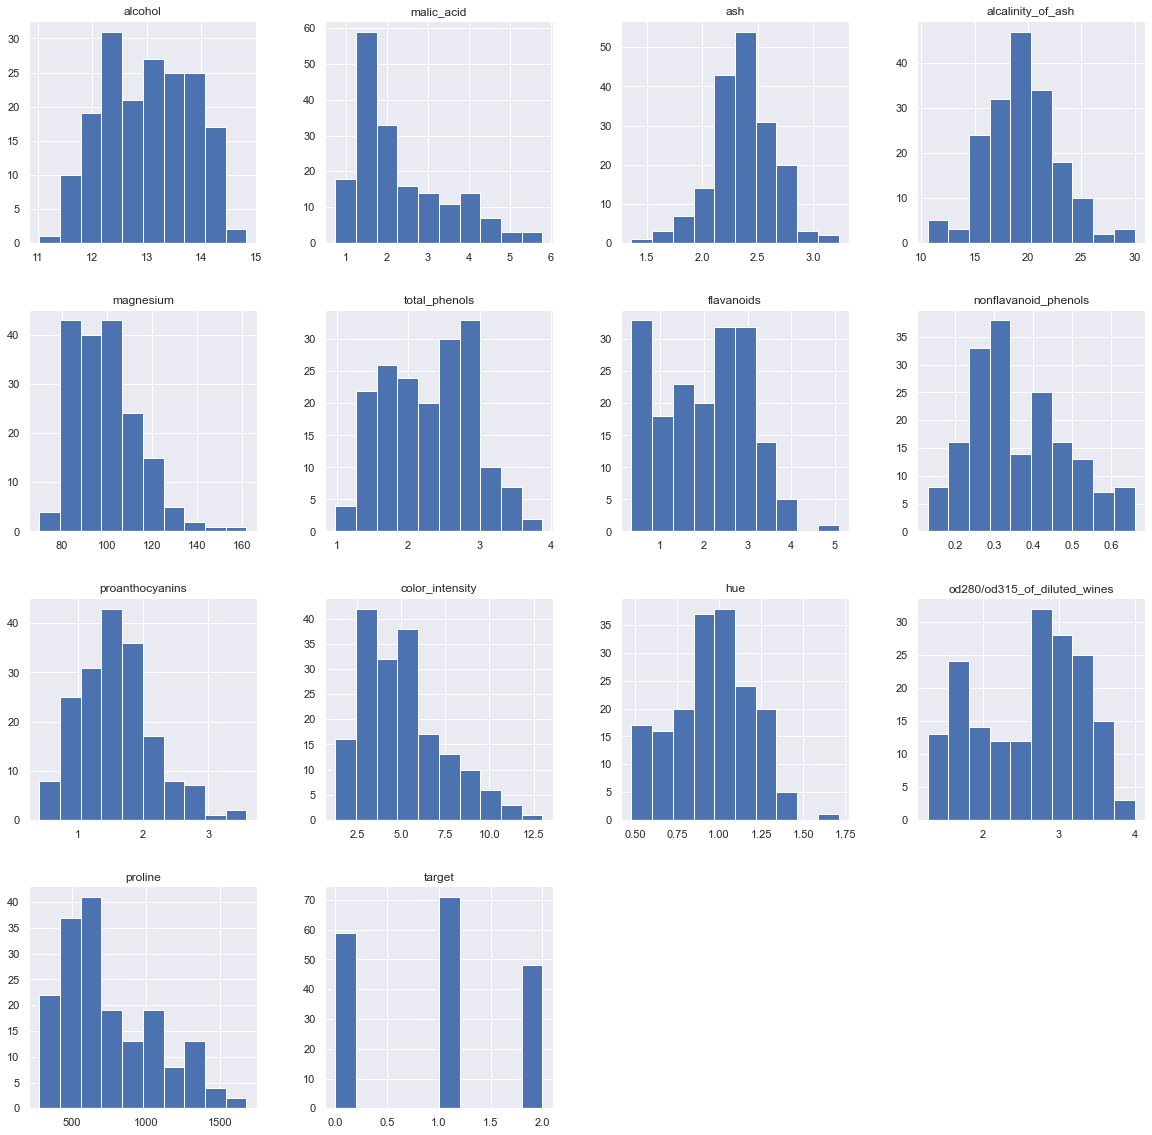

In [119]:
plt.rcParams["figure.figsize"] = (20,20)
df.hist()
plt.show()

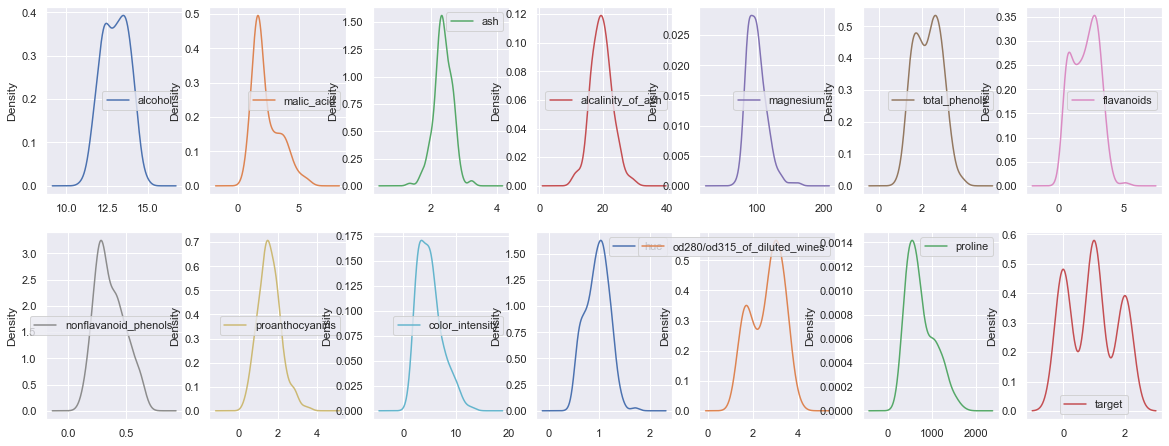

In [120]:
df.plot(kind='density', subplots=True, layout=(5,7), sharex=False)
plt.show()

In [121]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [122]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [123]:
duplicate_values = df[df.duplicated()]
duplicate_values

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target


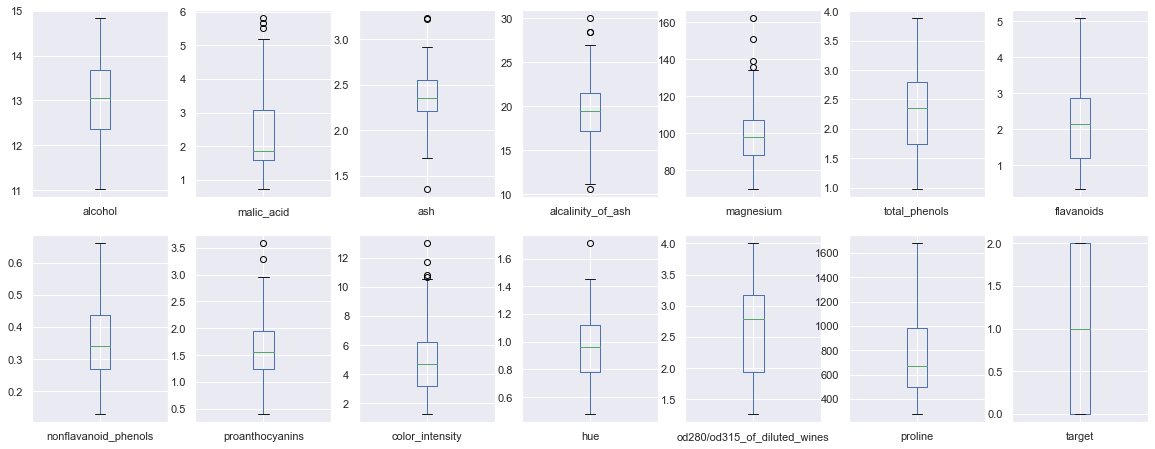

In [124]:
df.plot(kind='box', subplots=True, layout=(5,7), sharex=False, sharey=False)
plt.show()

In [13]:
correlation = df.corr(method='spearman')
columns = correlation.nlargest(5,'target').index
columns

Index(['target', 'alcalinity_of_ash', 'nonflavanoid_phenols', 'malic_acid',
       'color_intensity'],
      dtype='object')

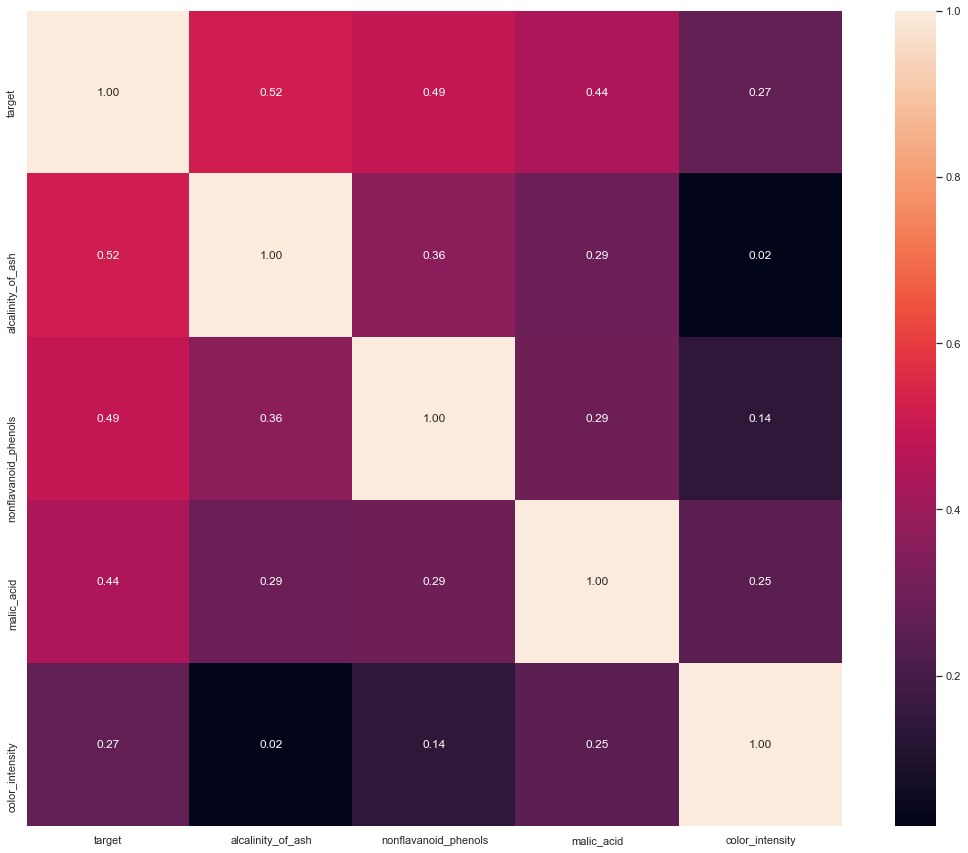

In [14]:
f = plt.figure(figsize=(19, 15))
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

##### Seperate dataset into features and output 

In [135]:
values = df.values

X = values[:,0:13]
Y = values[:,13]

##### Feature Scaling 

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initialize scaler 
scaler.fit(X) # learn the necessary info from data 
X_scaled  = scaler.fit_transform(X) # apply scaling 

In [137]:
df_scaled = pd.DataFrame(X_scaled)

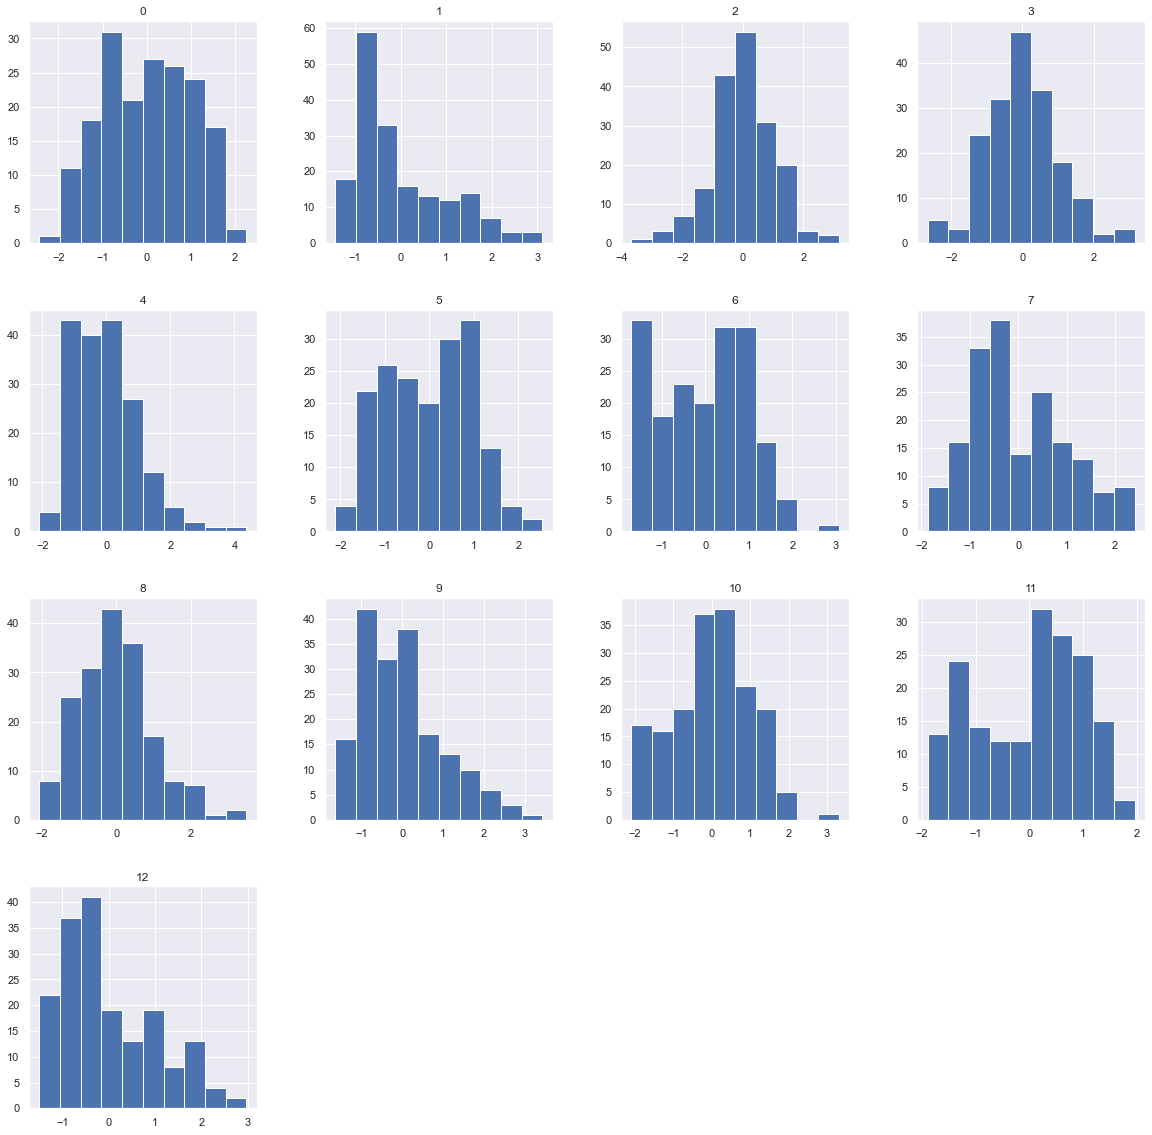

In [18]:
plt.rcParams["figure.figsize"] = (20,20)
df_scaled.hist()
plt.show()

In [138]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"

results_no_noise={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X_scaled, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_no_noise[i]=cv_results.mean()

 LR: 0.987958 (+/- 0.022741)
LDA: 0.989599 (+/- 0.022268)
kNN: 0.969720 (+/- 0.035930)
 DT: 0.895261 (+/- 0.077576)
 NB: 0.979032 (+/- 0.033058)
SVM: 0.960029 (+/- 0.034670)
 RF: 0.981451 (+/- 0.025916)
 GB: 0.942800 (+/- 0.051265)
XGB: 0.969199 (+/- 0.038694)
AdaBoost: 0.896567 (+/- 0.096544)
ANN: 0.983443 (+/- 0.026625)


In [20]:
# Multiple results from cross validation for statistical tests

In [21]:
def cv_res (results):  
    
    a = [5,10,15,20,25,30,35,40,45,50]

    x = []

    sum = 0

    for i , result in enumerate(results):
       
        sum += result

        if i+1 in a: 
            x.append(sum/5)
            sum=0
    return x

In [22]:
m =[]
for i in models:
    m.append(i[0])

f1_results = pd.DataFrame()


for i, m in enumerate(m):
    f1_results[str(m)] = cv_res(results[i])

f1_results    

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.989744,0.988811,0.957265,0.889836,0.989495,0.943662,0.989744,0.956690,0.977622,0.920919,0.965848
1,0.988811,0.986555,0.978555,0.900948,0.967273,0.975366,0.967166,0.919602,0.966511,0.935545,0.988811
2,0.988811,0.966703,0.967366,0.807465,0.967801,0.943471,0.967801,0.860221,0.932166,0.876102,0.978306
3,0.989744,1.000000,0.979239,0.949735,0.988811,0.956198,0.989744,0.966829,0.989744,0.911694,0.988148
4,0.978555,0.988148,0.957920,0.882523,0.978355,0.955563,0.978555,0.968099,0.978555,0.902627,0.965771
5,0.988811,0.988811,0.977208,0.919332,0.977008,0.964424,0.978306,0.964893,0.961639,0.874008,0.975613
6,0.989744,0.988811,0.947541,0.912370,0.988811,0.967366,0.978555,0.936253,0.956495,0.841084,1.000000
7,0.988148,0.988148,0.988148,0.942694,0.967138,0.962328,0.988148,0.967387,0.976027,0.935207,0.974180
8,0.989744,1.000000,0.989744,0.886299,0.989495,0.988811,0.989744,0.957437,0.977622,0.855036,0.988811
9,0.987464,1.000000,0.954216,0.865796,0.976135,0.943105,0.975613,0.920383,0.975613,0.913453,0.975613


### Add noise_1

In [23]:
def noise(X,noise=5):
    
    from noisify.recipes import human_error
    from noisify.recipes import machine_error

    combined_noise = machine_error(noise) + human_error(noise)
    X_noise = np.empty([X.shape[0], X.shape[1]])
    
    for i in range(X.shape[1]):
        col = X[:,i]
        nos = np.array(list(combined_noise(col)))
        X_noise[:,i] = nos
        
    return X_noise

In [24]:
X_noise = noise(X_scaled, noise=2)

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"

results_noise_1={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X_noise, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise_1[i]=cv_results.mean()


 LR: 0.936176 (+/- 0.046051)
LDA: 0.930807 (+/- 0.052552)
kNN: 0.930231 (+/- 0.050717)
 DT: 0.819637 (+/- 0.088249)
 NB: 0.935039 (+/- 0.052569)
SVM: 0.933995 (+/- 0.057821)
 RF: 0.928566 (+/- 0.060358)
 GB: 0.903675 (+/- 0.063138)
XGB: 0.918847 (+/- 0.060237)
AdaBoost: 0.733505 (+/- 0.165994)
ANN: 0.936040 (+/- 0.056016)


In [26]:
# Multiple results from cross validation for statistical tests

In [27]:
m =[]
for i in models:
    m.append(i[0])

f1_results_noise = pd.DataFrame()


for i, m in enumerate(m):
    f1_results_noise[str(m)] = cv_res(results[i])

f1_results_noise

,LR,LDA,kNN,DT,NB,SVM,RF,GB,XGB,AdaBoost,ANN
0,0.957379,0.967635,0.968298,0.826696,0.968982,0.955407,0.968982,0.917684,0.954900,0.731614,0.966040
1,0.902230,0.891782,0.898497,0.847375,0.903348,0.913141,0.887742,0.890843,0.889304,0.797112,0.902230
2,0.925319,0.915063,0.900507,0.751980,0.925241,0.935449,0.933214,0.891754,0.878513,0.678187,0.936353
3,0.956247,0.956247,0.968050,0.833559,0.947088,0.945335,0.945493,0.924154,0.945493,0.830127,0.956247
4,0.946653,0.936275,0.946731,0.848290,0.946653,0.932821,0.967366,0.923874,0.935001,0.735252,0.935571
5,0.931727,0.908271,0.907615,0.792731,0.921959,0.921190,0.907559,0.863814,0.896448,0.607984,0.931646
6,0.934765,0.924631,0.912110,0.755020,0.914126,0.955045,0.914126,0.902380,0.925237,0.794382,0.935742
7,0.942356,0.942356,0.944778,0.867219,0.955158,0.927861,0.929230,0.917464,0.908311,0.774346,0.931032
8,0.977892,0.989744,0.969109,0.885714,0.979365,0.955584,0.988148,0.957008,0.967436,0.729494,0.968148
9,0.887194,0.876069,0.886616,0.787783,0.888464,0.898120,0.843804,0.847772,0.887829,0.656554,0.897388


### Add noise_2

In [28]:
X_noise_2 = noise(X_scaled, noise=5)

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise_2={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X_noise_2, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise_2[i]=cv_results.mean()

 LR: 0.888661 (+/- 0.067661)
LDA: 0.909387 (+/- 0.060902)
kNN: 0.889950 (+/- 0.062368)
 DT: 0.780338 (+/- 0.077634)
 NB: 0.913731 (+/- 0.070470)
SVM: 0.861460 (+/- 0.074393)
 RF: 0.904201 (+/- 0.068873)
 GB: 0.867471 (+/- 0.062283)
XGB: 0.880145 (+/- 0.076541)
AdaBoost: 0.760527 (+/- 0.124920)
ANN: 0.904844 (+/- 0.068171)


### Add noise_3

In [30]:
X_noise_3 = noise(X_scaled, noise=8)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise_3={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X_noise_3, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise_3[i]=cv_results.mean()

 LR: 0.864718 (+/- 0.072534)
LDA: 0.868655 (+/- 0.071680)
kNN: 0.832346 (+/- 0.084752)
 DT: 0.721466 (+/- 0.116319)
 NB: 0.883191 (+/- 0.066573)
SVM: 0.866084 (+/- 0.077250)
 RF: 0.871770 (+/- 0.070180)
 GB: 0.830684 (+/- 0.080124)
XGB: 0.835574 (+/- 0.078814)
AdaBoost: 0.769161 (+/- 0.108958)
ANN: 0.877859 (+/- 0.067026)


### Add noise_4

In [32]:
X_noise_4 = noise(X_scaled, noise=10)

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise_4={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X_noise_4, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise_4[i]=cv_results.mean()

 LR: 0.855262 (+/- 0.072635)
LDA: 0.863272 (+/- 0.075649)
kNN: 0.871845 (+/- 0.063536)
 DT: 0.721799 (+/- 0.098060)
 NB: 0.899155 (+/- 0.054067)
SVM: 0.853829 (+/- 0.072942)
 RF: 0.881875 (+/- 0.074270)
 GB: 0.857287 (+/- 0.080549)
XGB: 0.863896 (+/- 0.081205)
AdaBoost: 0.802848 (+/- 0.088732)
ANN: 0.884436 (+/- 0.075562)


### Plot the f1_scores 

In [34]:
f1_consolidated_results = pd.DataFrame()
f1_consolidated_results = f1_consolidated_results.append(results_no_noise, ignore_index=True)
f1_consolidated_results = f1_consolidated_results.append(results_noise_1, ignore_index=True)
f1_consolidated_results = f1_consolidated_results.append(results_noise_2, ignore_index=True)
f1_consolidated_results = f1_consolidated_results.append(results_noise_3, ignore_index=True)
f1_consolidated_results = f1_consolidated_results.append(results_noise_4, ignore_index=True)

In [35]:
f1_consolidated_results

,ANN,AdaBoost,DT,GB,LDA,LR,NB,RF,SVM,XGB,kNN
0,0.980110,0.896567,0.895700,0.941779,0.989599,0.987958,0.979032,0.980337,0.960029,0.969199,0.969720
1,0.936040,0.733505,0.819637,0.903675,0.930807,0.936176,0.935039,0.928566,0.933995,0.918847,0.930231
2,0.904844,0.760527,0.780338,0.867471,0.909387,0.888661,0.913731,0.904201,0.861460,0.880145,0.889950
3,0.877859,0.769161,0.721466,0.830684,0.868655,0.864718,0.883191,0.871770,0.866084,0.835574,0.832346
4,0.884436,0.802848,0.721799,0.857287,0.863272,0.855262,0.899155,0.881875,0.853829,0.863896,0.871845


<AxesSubplot:>

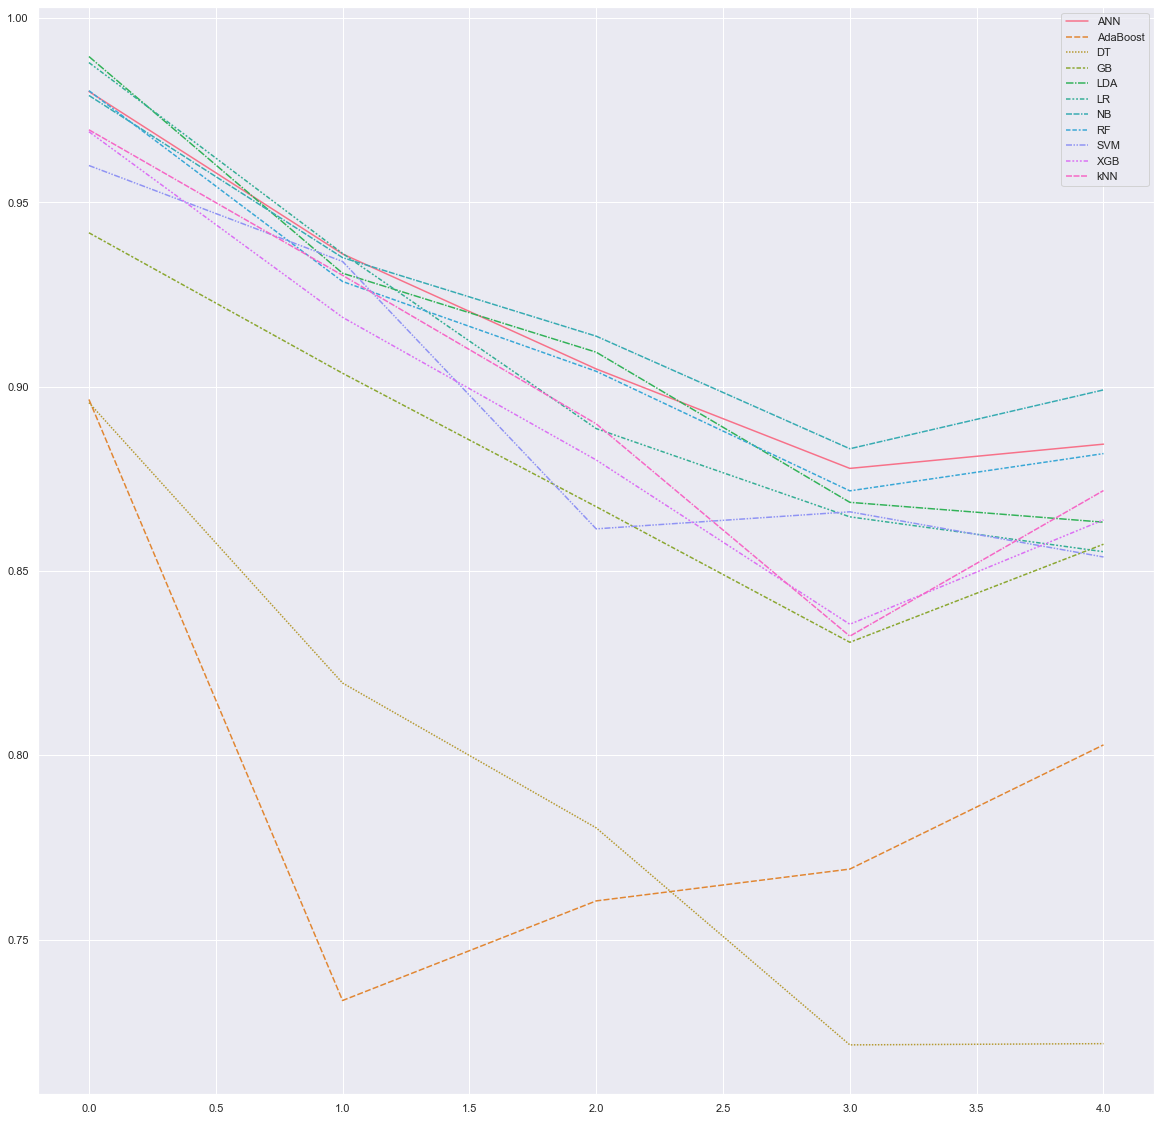

In [36]:
sns.lineplot(data=f1_consolidated_results)
#plt.xticks(['no_noise','noise_1','noise_2','noise_3','noise_4'])

### T-test Statistic 

In [154]:
from scipy.stats import ttest_ind as ttest

Hypothesis

H0: The effect of noise does not effect the models efficiency f1_no_noise = f1_noise

H1: There is effect of noise in the models efficiency f1_no_noise <> f1_noise

In [155]:
t_value,p_value=ttest(f1_results['AdaBoost'],f1_results_noise['AdaBoost'])

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05
  
if p_value<=alpha:

    print('Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at %.2f level of significance.'''%alpha)

else:

    print('Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. So we conclude that the effect of noise do not change the models efficiency at %.2f level of significance.''' %alpha)


Test statistic is 6.694133
p-value for two tailed test is 0.000003
Since p-value(=0.000003) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the effect of noise in models efficiency at 0.05 level of significance.


## Noise without noisify 

In [127]:
def add_noise(X,p):
    if p>0:
        X_n = pd.DataFrame(X)
        a,b = X.shape
        c = round(a*p)

        for k in range(b):
            mean = X_n[k].mean()
            sd = X_n[k].std()

            for i in range(0,a,int(a/c)):
                X_n.iloc[i,k] = np.random.normal(mean,sd)

        return X_n.values

    else:
        return X

#### Add noise 5%

In [139]:
X2_noise1 = add_noise(X_scaled, p=0.05)

In [140]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_1={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise1, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_1[i]=cv_results.mean()

 LR: 0.935099 (+/- 0.052110)
LDA: 0.939631 (+/- 0.052465)
kNN: 0.930748 (+/- 0.054666)
 DT: 0.850072 (+/- 0.092072)
 NB: 0.922240 (+/- 0.060353)
SVM: 0.924793 (+/- 0.062594)
 RF: 0.935854 (+/- 0.052941)
 GB: 0.918658 (+/- 0.063439)
XGB: 0.923283 (+/- 0.060511)
AdaBoost: 0.871645 (+/- 0.093833)
ANN: 0.923262 (+/- 0.054785)


#### Add noise 10%

In [141]:
X2_noise2 = add_noise(X_scaled,p=.1)

In [142]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_2={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise2, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_2[i]=cv_results.mean()

 LR: 0.875199 (+/- 0.077638)
LDA: 0.880805 (+/- 0.085144)
kNN: 0.872900 (+/- 0.077163)
 DT: 0.791957 (+/- 0.098759)
 NB: 0.864772 (+/- 0.080655)
SVM: 0.840691 (+/- 0.094264)
 RF: 0.885721 (+/- 0.080241)
 GB: 0.885265 (+/- 0.077321)
XGB: 0.878822 (+/- 0.084360)
AdaBoost: 0.783849 (+/- 0.122818)
ANN: 0.868971 (+/- 0.088399)


#### Add noise 15%

In [143]:
X2_noise3 = add_noise(X_scaled,p=.15)

In [144]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_3={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise3, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_3[i]=cv_results.mean()

 LR: 0.777358 (+/- 0.094322)
LDA: 0.783749 (+/- 0.088401)
kNN: 0.765618 (+/- 0.087858)
 DT: 0.704267 (+/- 0.115687)
 NB: 0.798278 (+/- 0.089656)
SVM: 0.762473 (+/- 0.091286)
 RF: 0.788314 (+/- 0.091984)
 GB: 0.766450 (+/- 0.094036)
XGB: 0.759652 (+/- 0.092668)
AdaBoost: 0.742342 (+/- 0.104213)
ANN: 0.757378 (+/- 0.087187)


#### Add noise 20%

In [145]:
X2_noise4 = add_noise(X_scaled,p=.2)

In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_4={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise4, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_4[i]=cv_results.mean()

 LR: 0.659669 (+/- 0.139706)
LDA: 0.658233 (+/- 0.133203)
kNN: 0.598185 (+/- 0.121048)
 DT: 0.579622 (+/- 0.116973)
 NB: 0.620763 (+/- 0.123482)
SVM: 0.631260 (+/- 0.127315)
 RF: 0.659898 (+/- 0.121314)
 GB: 0.645402 (+/- 0.115291)
XGB: 0.668948 (+/- 0.122255)
AdaBoost: 0.556747 (+/- 0.141789)
ANN: 0.621090 (+/- 0.115059)


In [150]:
f1_consolidated_results2 = pd.DataFrame()
f1_consolidated_results2 = f1_consolidated_results2.append(results_no_noise, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_1, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_2, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_3, ignore_index=True)
f1_consolidated_results2 = f1_consolidated_results2.append(results_noise2_4, ignore_index=True)

<AxesSubplot:>

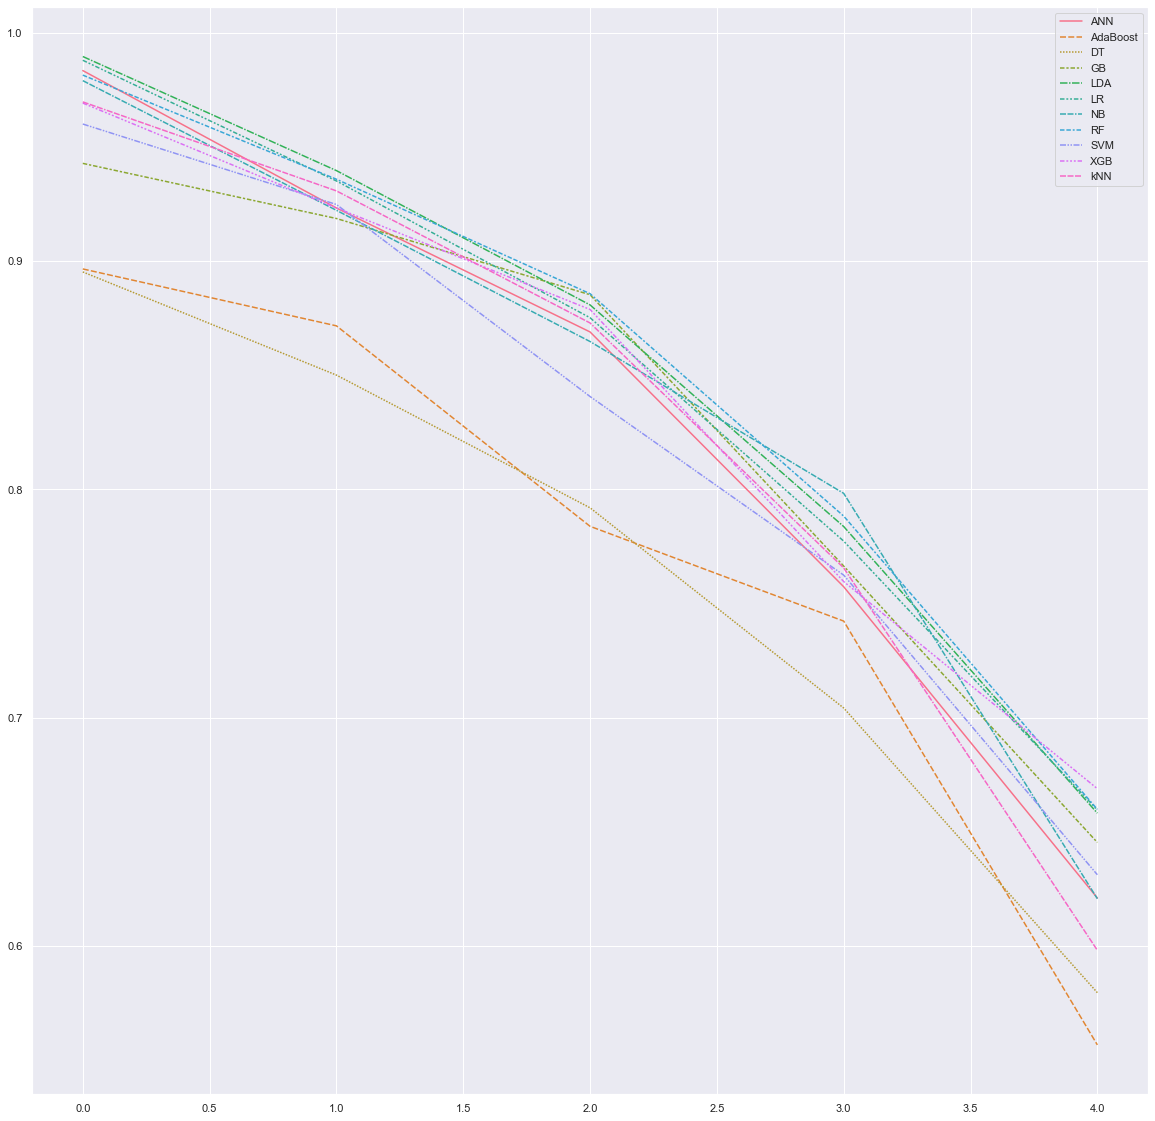

In [151]:
sns.lineplot(data=f1_consolidated_results2)

In [152]:
X2_noise5 = add_noise(X_scaled,p=.6)

In [153]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"


results_noise2_5={}

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2_noise5, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))
    results_noise2_5[i]=cv_results.mean()

 LR: 0.262094 (+/- 0.084057)
LDA: 0.260413 (+/- 0.086489)
kNN: 0.294480 (+/- 0.073774)
 DT: 0.316514 (+/- 0.123010)
 NB: 0.264165 (+/- 0.087489)
SVM: 0.247181 (+/- 0.076400)
 RF: 0.283972 (+/- 0.083872)
 GB: 0.275281 (+/- 0.097461)
XGB: 0.306879 (+/- 0.077248)
AdaBoost: 0.303819 (+/- 0.095159)
ANN: 0.270120 (+/- 0.085503)
